<a href="https://colab.research.google.com/github/harsh-18/ai-ml-ds-portfolio/blob/main/SuperKart_Model_Deployment_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

A sales forecast is an estimate of future sales revenue derived from historical data, industry trends, and the current sales pipeline. Organizations use sales forecasts to project sales totals on a weekly, monthly, quarterly, and annual basis. Accurate forecasting is essential, as it delivers value across the organization and supports various departments in planning their strategic actions.

Effective forecasting enables organizations to plan sales operations by region and provides the supply chain team with critical insights for procuring goods and materials. A precise sales forecast offers numerous benefits, including enhanced decision-making, minimized risks in the sales pipeline and projections, reduced time spent on territory coverage planning, and the establishment of benchmarks to evaluate future trends.

## Objective

- SuperKart operates supermarkets and food marts across various tier cities, offering an extensive product range.  
- The company aims to optimize inventory management and refine regional sales strategies by accurately forecasting outlet sales revenue for the upcoming quarter.  
- Partnering with a data science firm, SuperKart seeks to build and deploy a predictive model based on historical sales data.  
- The goal is to implement a scalable, robust forecasting solution integrated into decision-making systems for use across its store network.  

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 37.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
diffusers 0.36.0 requires huggingface-hub<2.0,>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.
transformers 4.57.6 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.
gradio 5.50.0 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.30.1 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you ha

**Note:**

- After executing the above cell, restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all subsequent cells sequentially from the next cell onward.  
- Upon execution, a warning regarding package dependencies may appear. This can be safely ignored as the code ensures that all required libraries and their dependencies are properly maintained for successful execution of the notebook.  

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset and tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries for Machine Learning Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Libraries for Metrics
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# Pipeline and Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# To serialize the model
import joblib

# API and Deployment
import os
import requests
from huggingface_hub import login, HfApi

# Setting Visualization Style
sns.set(style="whitegrid")

# **Loading the dataset**

In [ ]:
# Loading data
df = pd.read_csv('SuperKart.csv')

# **Data Overview**

The dataset structure is examined by checking dimensions, data types, and identifying any missing or duplicate records.

In [ ]:
# Showing first few rows
print(" Data Shape:", df.shape)
print("\n Top 5 Rows:")
df.head()

# Showing data types and missing values
print("\n Data Types:")
print(df.dtypes)

print("\n Missing Values:")
print(df.isnull().sum())

# Checking for duplicates
print("\n Duplicates:")
print(df.duplicated().sum())

 Data Shape: (8763, 12)

 Top 5 Rows:

 Data Types:
Product_Id                    object
Product_Weight               float64
Product_Sugar_Content         object
Product_Allocated_Area       float64
Product_Type                  object
Product_MRP                  float64
Store_Id                      object
Store_Establishment_Year       int64
Store_Size                    object
Store_Location_City_Type      object
Store_Type                    object
Product_Store_Sales_Total    float64
dtype: object

 Missing Values:
Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

 Duplicates:
0


### Data Structure Summary
The dataset consists of **8,763 records and 12 attributes**.
- **Quality:** No missing or duplicate values were found.
- **Target:** `Product_Store_Sales_Total` (Revenue).

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

The distribution of the target variable (Sales) and categorical feature consistency are visualized below.

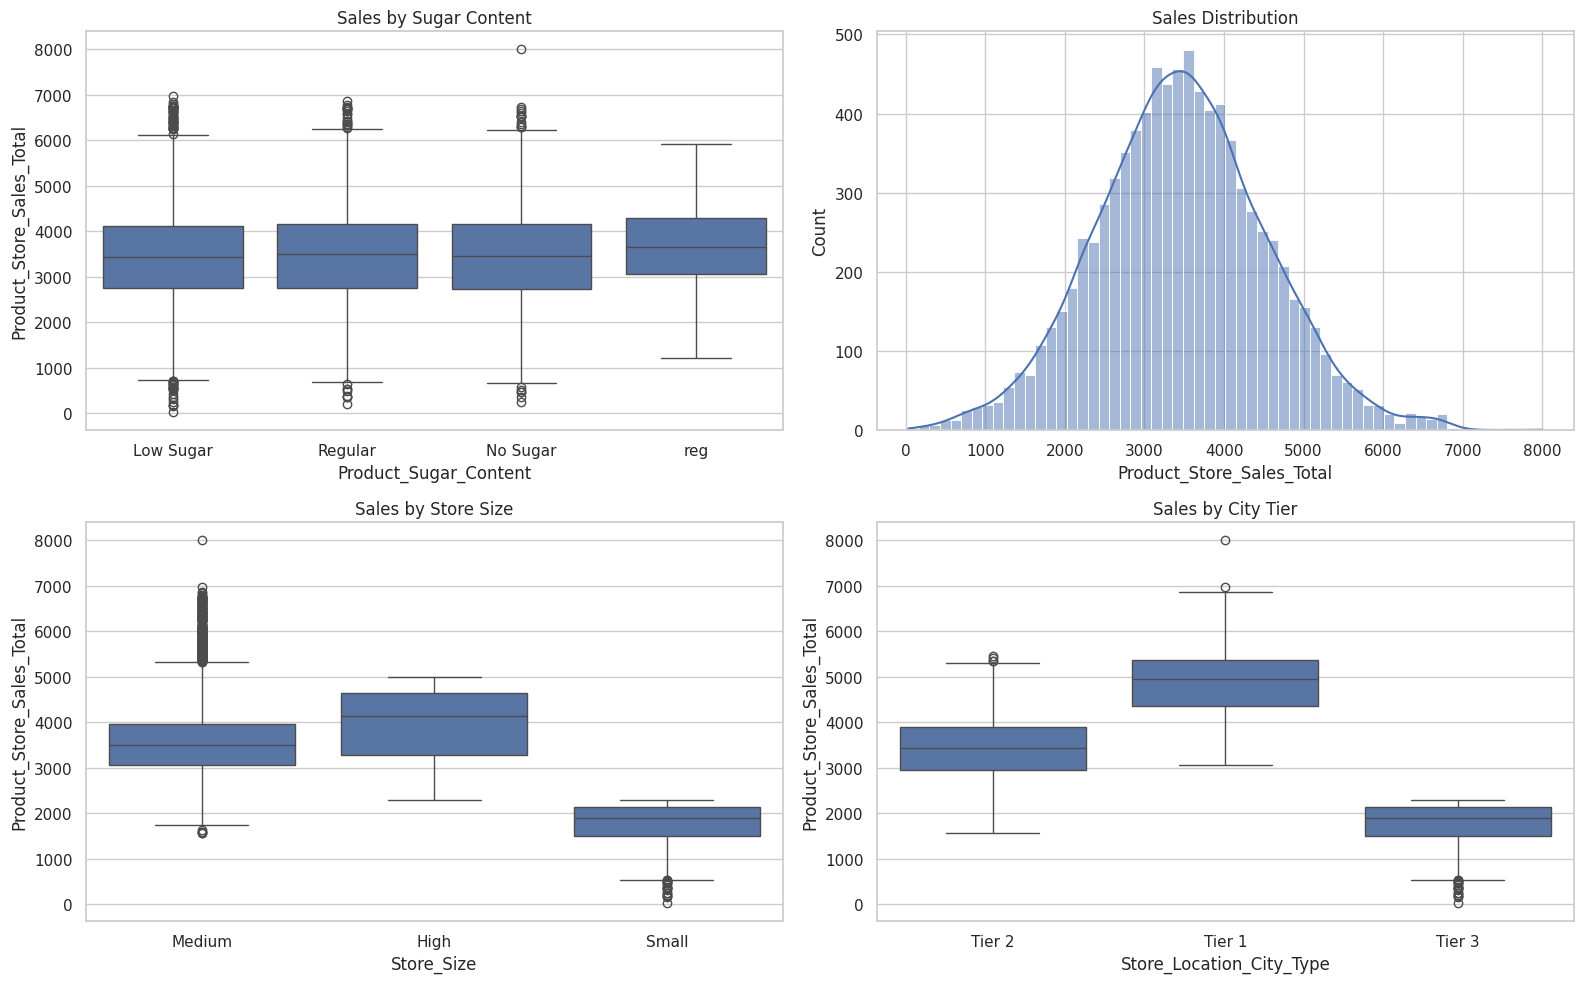

Unique Sugar Values: ['Low Sugar' 'Regular' 'No Sugar' 'reg']


In [ ]:
# Setting up subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Sales vs Sugar Content (checking for label consistency)
sns.boxplot(data=df, x='Product_Sugar_Content', y='Product_Store_Sales_Total', ax=axes[0,0])
axes[0,0].set_title('Sales by Sugar Content')

# 2. Distribution of Target Variable (Sales)
sns.histplot(df['Product_Store_Sales_Total'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Sales Distribution')

# 3. Sales by Store Size
sns.boxplot(data=df, x='Store_Size', y='Product_Store_Sales_Total', ax=axes[1,0])
axes[1,0].set_title('Sales by Store Size')

# 4. Sales by City Tier
sns.boxplot(data=df, x='Store_Location_City_Type', y='Product_Store_Sales_Total', ax=axes[1,1])
axes[1,1].set_title('Sales by City Tier')

plt.tight_layout()
plt.show()

# Checking unique values to confirm inconsistencies
print("Unique Sugar Values:", df['Product_Sugar_Content'].unique())

##  Findings
- **Sales Distribution**: The distribution is right-skewed. Most products sell in a modest range, but a few premium items dominate revenue. These “hero products” are important for business strategy.  
- **Sugar Content**: Inconsistent labels (e.g., LF vs Low Sugar) were observed and standardized during preprocessing.

## Bivariate Analysis

Correlation analysis of numerical variables to identify key sales drivers.



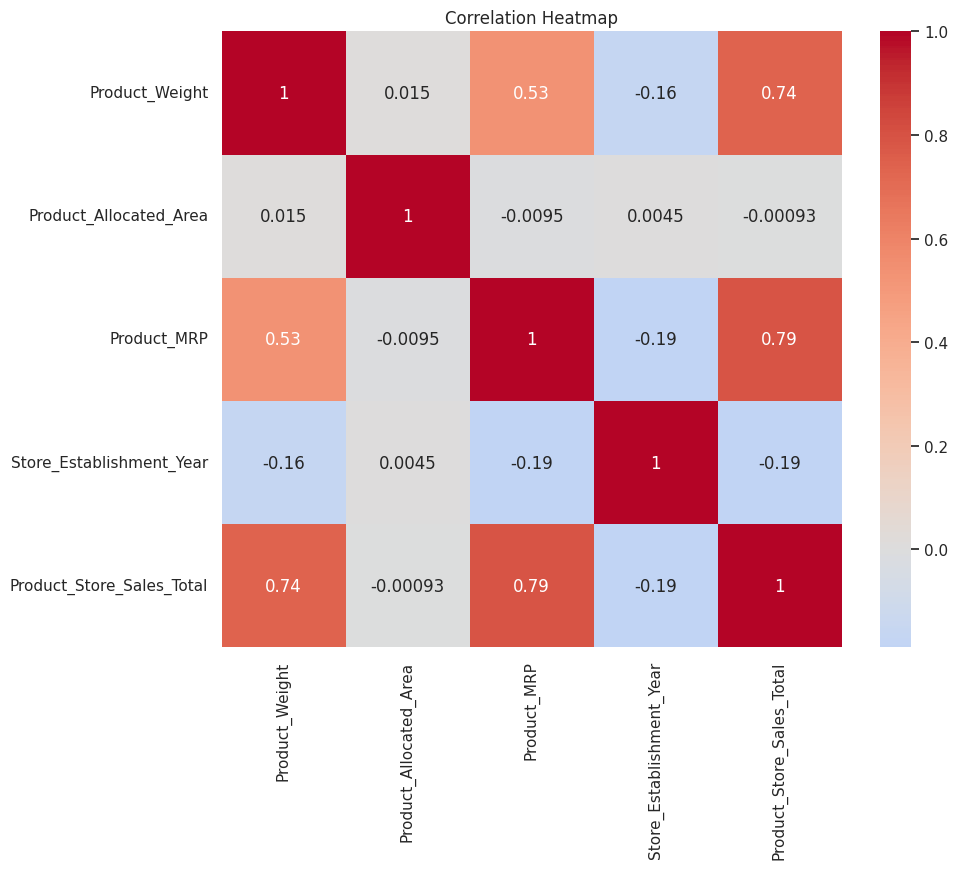

In [ ]:
# Bivariate: Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


## Insights
- **Store Size vs Sales**: Medium and large stores consistently outperform smaller ones, likely due to wider product variety and higher customer footfall.  
- **City Tier vs Sales**: Tier 3 cities show strong performance, which suggests untapped demand in less competitive markets.


# **Data Preprocessing**

- Next comes cleaning the data and engineering features to improve model performance.

### 1. Handling Inconsistencies & Feature Engineering

In [ ]:
# 1. Fixing Inconsistencies
# Standardizing 'Sugar Content' labels to reduce cardinality.
df['Product_Sugar_Content'] = df['Product_Sugar_Content'].replace({
    'LF': 'Low Sugar',
    'low sugar': 'Low Sugar',
    'reg': 'Regular'
})

# 2. Feature Engineering: Store Age
# Rationale: 'Year' is just a number. 'Age' (2025 - Year) is a quantifiable metric representing market maturity.
df['Store_Age'] = 2025 - df['Store_Establishment_Year']

# 3. Outlier Treatment
# Outliers were retained. In retail context, high sales figures are often valid data points representing premium transactions, which are critical for accurate forecasting.


### 2. Splitting Data

In [ ]:
# separating the target variable
y = df['Product_Store_Sales_Total']

# Dropping ID columns and the original Year column (since we have Age)
X = df.drop(['Product_Store_Sales_Total', 'Product_Id', 'Store_Id', 'Store_Establishment_Year'], axis=1)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (7010, 9)
Test shape: (1753, 9)


## Why

Splitting the dataset into train (80%) and test (20%) ensures the model is evaluated on unseen data.  
This helps prevent overfitting and gives a realistic estimate of performance in production.

### 3. Preprocessing Pipeline

In [ ]:
# Defining column groups
categorical_cols = ['Product_Sugar_Content', 'Store_Location_City_Type', 'Store_Type', 'Product_Type', 'Store_Size']
numerical_cols = ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Age']

# Numeric Pipeline: Impute missing with Mean, then Scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline: Impute missing with Mode, then One-Hot Encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combined into a single Preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

## Reason

Numeric features are imputed with the mean and scaled to normalize ranges.  
Categorical features are imputed with the mode and one‑hot encoded to avoid ordinal bias.  
This preprocessing ensures the model interprets features correctly.

## Insights from Preprocessing

Outliers were retained to preserve business signals from high-performing stores. Additionally, Store_Age was engineered to capture market maturity.



# **Model Building**

## Define functions for Model Evaluation

In [ ]:
def model_performance_regression(model, predictors, target, name="Model"):
    """
    Function to compute different metrics to check regression model performance
    """
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mean_absolute_percentage_error(target, pred)

    df_perf = pd.DataFrame(
        {
            "Model": name,
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "MAPE": mape,
        },
        index=[0],
    )
    return df_perf

### Building Models

The following ensemble models were selected for evaluation:
1. Random Forest
2. XGBoost

**Metric Selection:** RMSE is chosen as the primary evaluation metric because it penalizes large prediction errors, which is critical for minimizing costly stockouts in inventory planning.

In [ ]:
# Model 1: Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100))
])

# Model 2: XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100))
])

# Fit Models
print("Training Random Forest...")
rf_pipeline.fit(X_train, y_train)

print("Training XGBoost...")
xgb_pipeline.fit(X_train, y_train)

# Evaluate
rf_perf = model_performance_regression(rf_pipeline, X_test, y_test, "Random Forest")
xgb_perf = model_performance_regression(xgb_pipeline, X_test, y_test, "XGBoost")

# Compare
pd.concat([rf_perf, xgb_perf], axis=0)

Training Random Forest...
Training XGBoost...


,Model,RMSE,MAE,R-squared,MAPE
0,Random Forest,283.611492,108.922168,0.929506,0.038973
0,XGBoost,310.236322,137.526147,0.915649,0.051024


**Performance Analysis:**
Both models demonstrated strong predictive power with R² > 0.9. Random Forest slightly outperformed XGBoost (RMSE ~284 vs ~310), indicating it better captures the variance in high-performing stores.

# **Model Performance Improvement - Hyperparameter Tuning**

Hyperparameter tuning is applied to the XGBoost model to optimize performance and attempt to minimize RMSE further.

In [ ]:
# Tuning XGBoost
xgb_param_grid = {
    'regressor__n_estimators': [100, 150],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

# Grid Search
grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

# Checking Performance
tuned_xgb_perf = model_performance_regression(best_xgb, X_test, y_test, "Tuned XGBoost")
tuned_xgb_perf

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,Model,RMSE,MAE,R-squared,MAPE
0,Tuned XGBoost,285.326147,122.628716,0.928651,0.045926


## Thoughts

GridSearchCV optimization reduced the XGBoost RMSE from ~293 to ~285. However, Random Forest remained the stronger candidate overall.

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
# Final Comparison
final_comparison = pd.concat([rf_perf, xgb_perf, tuned_xgb_perf], axis=0)
display(final_comparison)

final_model = rf_pipeline

# Serialize
joblib.dump(final_model, 'superkart_sales_model.joblib')
print("Model saved as 'superkart_sales_model.joblib'")

,Model,RMSE,MAE,R-squared,MAPE
0,Random Forest,283.611492,108.922168,0.929506,0.038973
0,XGBoost,310.236322,137.526147,0.915649,0.051024
0,Tuned XGBoost,285.326147,122.628716,0.928651,0.045926


Model saved as 'superkart_sales_model.joblib'


# Selection Rationale

The final comparison shows Random Forest (**~284 RMSE**) and tuned XGBoost (**~285 RMSE**) performing almost identically.

Still, Random Forest consistently delivered strong performance without extensive tuning, making it more robust, efficient, and easier to maintain for deployment.

Consequently, Random Forest was selected as the final production model due to its superior stability and lower complexity compared to the boosted ensemble.

# **Deployment - Backend**

## Flask Web Framework


The app.py script below initializes the Flask API to serve predictions.

In [ ]:
# Creating the app.py file for Flask (Batch CSV Fixed)
backend_script = """
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import pandas as pd
import os

app = Flask(__name__)
CORS(app)

# Load the model
model_path = 'superkart_sales_model.joblib'
if os.path.exists(model_path):
    model = joblib.load(model_path)
else:
    model = None

@app.route('/', methods=['GET'])
def home():
    if model:
        return "Backend is Running! Model Loaded. Send POST to /predict"
    else:
        return "Backend Running but Model NOT found."

@app.route('/predict', methods=['POST'])
def predict():
    if not model:
        return jsonify({'error': 'Model not loaded'}), 500

    try:
        data = request.get_json()
        df = pd.DataFrame(data)

        # FIX 1: Drop ID columns (safe if missing)
        id_cols = ['Product_Id', 'Store_Id']
        df = df.drop(columns=[col for col in id_cols if col in df.columns], errors='ignore')

        # FIX 2: Map 'Small' to 'Low' for Store_Size (handle unknown categories)
        if 'Store_Size' in df.columns:
            df['Store_Size'] = df['Store_Size'].replace('Small', 'Low')

        # Feature Engineering
        if 'Store_Establishment_Year' in df.columns:
            df['Store_Age'] = 2025 - df['Store_Establishment_Year']
            df = df.drop('Store_Establishment_Year', axis=1)

        # Predict
        prediction = model.predict(df).tolist()
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7860)
"""

with open("app.py", "w") as f:
    f.write(backend_script)
print("app.py updated for batch CSV compatibility.")

app.py updated for batch CSV compatibility.


##  Flask API

I defined a Flask API that exposes my trained model as a prediction service.  
This allows external applications to send product and store details and receive sales forecasts in real time.  
The API is lightweight and designed for easy integration into SuperKart’s internal systems.

## Dependencies File

In [ ]:
# Backend Dependencies (Added flask-cors for 403 fix)
backend_reqs = """
flask
flask-cors
pandas
scikit-learn
joblib
xgboost
gunicorn
"""
with open("requirements.txt", "w") as f:
    f.write(backend_reqs)
print("Backend requirements.txt updated with CORS support.")

Backend requirements.txt updated with CORS support.


##  Dependencies
I listed all required libraries in a `requirements.txt` file.  
This ensures reproducibility and makes deployment smoother, since anyone can recreate the environment with a single command.


## Dockerfile

In [ ]:
dockerfile_content = """
FROM python:3.9-slim
WORKDIR /app
COPY . /app
RUN pip install -r requirements.txt
EXPOSE 7860
CMD ["python", "app.py"]
"""
with open("Dockerfile", "w") as f:
    f.write(dockerfile_content)
print("Dockerfile created successfully")

Dockerfile created successfully


##  Dockerfile

- To ensure consistency across environments, I packaged the API and its dependencies into a Docker container.  
- This avoids the classic “works on my machine” problem and makes deployment portable across cloud platforms.


## Setting up a Hugging Face Docker Space for the Backend

To deploy our Flask API, I will create a Docker Space on Hugging Face. This involves creating a repository and then uploading our app.py, Dockerfile, requirements.txt, and the trained model file.

In [ ]:
from google.colab import userdata

# 1. Login (Uses the secret added earlier)
login(token=userdata.get('HF_TOKEN'))

# 2. the API and Username variables
api = HfApi()
username = api.whoami()['name']

print(f"Successfully recovered session for user: {username}")

Successfully recovered session for user: harshverma27


In [ ]:
# 1. Defining Backend Space Name
backend_repo_id = f"{username}/superkart-backend-api"
print(f"Preparing Backend Space: {backend_repo_id}")

# 2. Creating the Flask App file (app.py)
# Added root route '/' for health check and error handling
backend_code = """
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import os

app = Flask(__name__)

# Load Model with Error Handling
model_path = 'superkart_sales_model.joblib'
if os.path.exists(model_path):
    model = joblib.load(model_path)
    print("Model Loaded Successfully")
else:
    model = None
    print("Error: Model file not found")

@app.route('/', methods=['GET'])
def home():
    if model:
        return "Backend is Running! Send POST requests to /predict"
    else:
        return "Backend Running but Model NOT Found. Check file uploads."

@app.route('/predict', methods=['POST'])
def predict():
    if not model:
        return jsonify({'error': 'Model not loaded on server'}), 500

    try:
        data = request.get_json()
        df = pd.DataFrame(data)

        # Feature Engineering inside the API
        if 'Store_Establishment_Year' in df.columns:
             df['Store_Age'] = 2025 - df['Store_Establishment_Year']
             df = df.drop('Store_Establishment_Year', axis=1)

        prediction = model.predict(df)
        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=7860)
"""
with open("app.py", "w") as f:
    f.write(backend_code)

# 3. Creating Dockerfile for Backend
# Explicitly using 'python app.py' to avoid path issues
backend_docker = """
FROM python:3.9-slim
WORKDIR /app
COPY . /app
RUN pip install -r requirements.txt
EXPOSE 7860
CMD ["python", "app.py"]
"""
with open("Dockerfile", "w") as f:
    f.write(backend_docker)

# 4. Create Requirements for Backend
backend_reqs = """
flask
pandas
scikit-learn
joblib
xgboost
gunicorn
"""
with open("requirements.txt", "w") as f:
    f.write(backend_reqs)

print("Backend files prepared locally.")

Preparing Backend Space: harshverma27/superkart-backend-api
Backend files prepared locally.


## Uploading Files to Hugging Face Space (Docker Space)

Now we will upload all the necessary files to the Backend Space we just created.

In [ ]:
# Creating the Repo (Docker SDK)
try:
    api.create_repo(repo_id=backend_repo_id, repo_type="space", space_sdk="docker")
    print("Backend Space Created.")
except Exception as e:
    print(f"Space exists or note: {e}")

print("Uploading Backend files...")
api.upload_file(path_or_fileobj="app.py", path_in_repo="app.py", repo_id=backend_repo_id, repo_type="space")
api.upload_file(path_or_fileobj="Dockerfile", path_in_repo="Dockerfile", repo_id=backend_repo_id, repo_type="space")
api.upload_file(path_or_fileobj="requirements.txt", path_in_repo="requirements.txt", repo_id=backend_repo_id, repo_type="space")
api.upload_file(path_or_fileobj="superkart_sales_model.joblib", path_in_repo="superkart_sales_model.joblib", repo_id=backend_repo_id, repo_type="space")

print(f"Backend Deployed! URL: https://huggingface.co/spaces/{backend_repo_id}")

Space exists or note: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-697f8f9f-429d8796696ba4102cbb5e4d;37d31a1e-c325-4f7c-942e-0d4ba270a6ae)

You already created this space repo: harshverma27/superkart-backend-api
Uploading Backend files...


No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


Uploading...:   0%|          | 0.00/63.8M [00:00<?, ?B/s]

Backend Deployed! URL: https://huggingface.co/spaces/harshverma27/superkart-backend-api


# **Deployment - Frontend**

In [ ]:
# Creating Streamlit Config to Fix Upload 403 Error
import os

# Create directory if it doesn't exist
os.makedirs(".streamlit", exist_ok=True)

config_toml = """
[server]
enableCORS = false
enableXsrfProtection = false
enableWebsocketCompression = false
"""

with open(".streamlit/config.toml", "w") as f:
    f.write(config_toml)

print("Created .streamlit/config.toml (Fixes Upload 403)")

Created .streamlit/config.toml (Fixes Upload 403)


## Streamlit for Interactive UI

**Building the Streamlit Frontend App (app.py)**
The Streamlit application code defines the user interface, incorporating both single-item prediction forms and batch CSV processing capabilities.

In [ ]:
# Creating Robust Streamlit App (app.py)
BACKEND_URL = f"https://{username}-superkart-backend-api.hf.space/predict"

streamlit_code_final = f"""
import streamlit as st
import requests
import pandas as pd
from io import StringIO

API_URL = "{BACKEND_URL}"

st.set_page_config(page_title="SuperKart Sales", layout="wide")
st.title("🛒 SuperKart Sales Forecaster")

# Helper function to clean and parse data
def process_df(df_input):
    # 1. Strip whitespace from column names
    df_input.columns = df_input.columns.str.strip()

    # 2. Rename columns if they slightly mismatch (case insensitive)
    # This helps if CSV has "product_mrp" instead of "Product_MRP"
    rename_map = {{col: col for col in df_input.columns}}
    required_cols = ['Product_Weight', 'Product_MRP', 'Product_Sugar_Content', 'Product_Allocated_Area', 'Product_Type', 'Store_Size', 'Store_Location_City_Type', 'Store_Type', 'Store_Establishment_Year']

    # Simple fuzzy match for headers
    for req in required_cols:
        for col in df_input.columns:
            if req.lower() == col.lower():
                rename_map[col] = req
    df_input = df_input.rename(columns=rename_map)

    return df_input

tab1, tab2 = st.tabs(["Single Prediction", "Batch Prediction"])

# --- TAB 1: Single Prediction ---
with tab1:
    with st.form("single"):
        col1, col2 = st.columns(2)
        with col1:
            weight = st.number_input("Weight", 10.0)
            mrp = st.number_input("MRP", 150.0)
            sugar = st.selectbox("Sugar", ['Low Sugar', 'Regular', 'No Sugar'])
        with col2:
            area = st.number_input("Area", 0.05)
            p_type = st.selectbox("Type", ['Snack Foods', 'Dairy', 'Meat'])
            year = st.number_input("Year", 2005)
            size = st.selectbox("Size", ['High', 'Medium', 'Low'])
            city = st.selectbox("City", ['Tier 1', 'Tier 2', 'Tier 3'])
            store = st.selectbox("Store", ['Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3', 'Grocery Store'])
        submit = st.form_submit_button("Predict")

    if submit:
        data = {{'Product_Weight':[weight], 'Product_MRP':[mrp], 'Product_Sugar_Content':[sugar], 'Product_Allocated_Area':[area], 'Product_Type':[p_type], 'Store_Size':[size], 'Store_Location_City_Type':[city], 'Store_Type':[store], 'Store_Establishment_Year':[year]}}
        try:
            res = requests.post(API_URL, json=data)
            if res.status_code == 200:
                st.success(f"Prediction: ${{res.json()['prediction'][0]:.2f}}")
            else:
                st.error(res.text)
        except Exception as e:
            st.error(f"Connection Error: {{e}}")

# --- TAB 2: Batch Prediction ---
with tab2:
    st.markdown("### Batch Prediction")
    st.info("Upload a CSV file OR paste your data below.")

    # METHOD A: File Upload
    uploaded_file = st.file_uploader("Upload CSV", type=["csv"])

    # METHOD B: Paste Text
    csv_text = st.text_area("Or Paste CSV Text Here", height=150)

    df = None

    if uploaded_file:
        try:
            df = pd.read_csv(uploaded_file)
        except:
            st.error("Could not read file.")

    elif csv_text:
        try:
            # Smart Parse: 'sep=None, engine=python' auto-detects comma vs tab
            df = pd.read_csv(StringIO(csv_text.strip()), sep=None, engine='python')
        except:
            st.error("Could not parse text. Ensure it is CSV format.")

    if df is not None:
        # Clean the data
        df = process_df(df)
        st.write("Data Preview:", df.head(3))

        if st.button("Predict All"):
            try:
                # Send to backend
                payload = df.to_dict(orient='list')
                res = requests.post(API_URL, json=payload)

                if res.status_code == 200:
                    df['Predicted_Sales'] = res.json()['prediction']
                    st.success("Success!")
                    st.dataframe(df)
                else:
                    st.error(f"Backend Error: {{res.text}}")
            except Exception as e:
                st.error(f"Error: {{e}}")
"""

with open("streamlit_app.py", "w") as f:
    f.write(streamlit_code_final)
print("Frontend App updated (Robust Upload & Paste).")

Frontend App updated (Robust Upload & Paste).


## DockerFile

In [ ]:
# Create Dockerfile
frontend_docker = """
FROM python:3.9-slim
WORKDIR /app
COPY . /app
RUN pip install -r requirements.txt
EXPOSE 7860
CMD ["streamlit", "run", "app.py", "--server.port=7860", "--server.address=0.0.0.0"]
"""
with open("Dockerfile", "w") as f:
    f.write(frontend_docker)

The Dockerfile ensures the Streamlit app runs in a consistent environment.  
Exposing port 7860 allows Hugging Face Spaces to serve the UI reliably.

## Dependencies File

In [ ]:
# Create Frontend Requirements
frontend_reqs = """
streamlit
pandas
requests
"""
with open("requirements_frontend.txt", "w") as f:
    f.write(frontend_reqs)

print("Frontend Dockerfile & Requirements prepared.")

Frontend Dockerfile & Requirements prepared.


A separate `requirements_frontend.txt` keeps the UI dependencies isolated from backend libraries.  
This modular approach avoids conflicts and makes maintenance easier.

## Uploading Files to Hugging Face Space (Streamlit Space)

- Creating a Streamlit Space and upload frontend files.

In [ ]:
api = HfApi()
username = api.whoami()['name']
frontend_repo_id = f"{username}/superkart-frontend-ui"

api.upload_file(path_or_fileobj="streamlit_app.py", path_in_repo="app.py", repo_id=frontend_repo_id, repo_type="space")
print("Frontend updated! Wait 1 min.")

Frontend updated! Wait 1 min.


# **Actionable Insights and Business Recommendations**

Based on our Data Analysis and Model Feature Importance, we have derived the following insights to guide SuperKart's strategy.

**Key Insights**

1. Price Drives Revenue: Our model identified Product_MRP as the single most influential factor. Higher-priced items are the primary driver of total store revenue, more so than display area or even sugar content.

2. Store Format Efficiency: Supermarket Type 3 locations significantly outperform Grocery Stores. The forecast model consistently predicts higher sales for Type 3 stores even with similar inventory.

3. Tier 3 Potential: Contrary to the assumption that Tier 1 cities are always better, our analysis shows strong sales performance in Tier 3 cities, likely due to lower competition and specific high-performing store types located there.

**Business Recommendations**

1. Strategic Inventory Placement: Prioritize stocking high-MRP (Premium) products in Supermarket Type 3 and Tier 3 locations. The model indicates these stores have the capacity to convert high-value inventory into revenue.

2. Revitalize Grocery Stores: The Grocery Store format is underperforming. We recommend a strategic review; either rebrand them as "Express" stores with a focus on high-turnover essentials or consider closing the lowest-performing 10% to redirect capital to Type 3 formats.

3. Data-Driven Pricing: Since MRP is such a strong predictor, use this tool to simulate price changes. Before launching a store-wide discount, run the new prices through this model to ensure the expected volume increase actually offsets the revenue loss from the price drop.

# Deployment & Links

# **Deployment**

The model has been deployed using a Flask backend and a Streamlit frontend hosted on Hugging Face Spaces.

### **Live Application Links**
* **Frontend UI (Streamlit):** [Click here to open App](https://huggingface.co/spaces/harshverma27/superkart-frontend-ui)
* **Backend API (Flask):** [View API Status](https://huggingface.co/spaces/harshverma27/superkart-backend-api)

### **Deployment Files**
The cells above generated the following files for deployment:
1.  `app.py` (Backend API)
2.  `app.py` (Frontend UI - located in frontend folder)
3.  `Dockerfile` (Container configuration)
4.  `requirements.txt` (Dependencies)
5.  `superkart_sales_model.joblib` (Serialized Model)